In [ ]:
# pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np


# Getting Data and Preprocessing

In [ ]:
#Getting BBH Data
target = 'BBH'
def getTargetData(target):
  ticker = yf.Ticker(target)
  start = "2010-01-01"
  end = "2023-01-01"
  data = ticker.history(start="2010-01-01", end = "2023-01-01", interval="1d")
  df = pd.DataFrame(data)
  df.drop(labels = ['High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Capital Gains'], axis = 1, inplace = True)
  df.rename(columns = {'Open' : target}, inplace = True)
  return df
# df.head()


In [ ]:
def addTicker(df, name):
  ticker = yf.Ticker(name)
  data = ticker.history(start="2010-01-01", end = "2023-01-01", interval="1d")
  df2 = pd.DataFrame(data)
  df2.rename(columns = {'Open' : name}, inplace = True)
  # print(df2)
  # print(df2.index.values)
  df[name] = df2[name]
  if df[name].isnull().values[0]:
    df.drop(name, axis=1, inplace=True)
  return
  # df.head()

In [ ]:
def getForwardPriceCol(df1, days, ticker):
  vals = []
  print(len(df1))
  for i in range(len(df1) - days):
    vals.append(df1.iloc[i+ days][ticker])
  df1 = df1[:(len(df1) - days)]
  print(len(df1))
  print(len(vals))
  df1['Forward'] = vals
  return df1
  

In [ ]:
def addMovingAvg(df1, days, ticker):
  vals = []
  # print(len(df1))
  sum = 0
  for i in range(1, len(df1)):
    sum = sum + df1.iloc[i-1][ticker]
    if i > days:
      sum = sum - df1.iloc[i - days - 1][ticker]
      vals.append(sum/days)
  df1 = df1[days + 1:]
  # print(len(df1))
  # print(len(vals))
  df1['MovingAvg'] = vals
  return df1

In [ ]:
target = 'BBH'
df = getTargetData(target)

In [ ]:
if target == 'JETS':
  holdings = {'UAL', 'AAL', 'DAL', 'LUV', 'ULCC', 'JBLU', 'ALK', 'HA', 'SNCY', 'ALGT', 'BKNG', 'BA', 'TRIP', 'EXPE', 'TXT'}
  similar = {'IYT', 'XTN'}
  otherIndicators = {'SPY', '^VIX', 'CL=F', 'OIL'}

if(target == 'BBH'):
  holdings = {'AMGN', 'GILD', 'VRTX', 'IQV', 'SGEN', 'BIIB', 'ICLR', 'ILMN', 'BGNE', 'BMRN', 'BMTX', 'ARGX', 'INCY'}
  similar = {'IBB', 'XBI', 'PBE'}
  otherIndicators = {'SPY', '^VIX'}

for ticker in holdings:
  addTicker(df, ticker)
for ticker in similar:
  addTicker(df, ticker)
for ticker in otherIndicators:
  addTicker(df, ticker)
df.head()

,BBH,ILMN,AMGN,BMRN,BIIB,VRTX,SGEN,GILD,ICLR,INCY,XBI,PBE,IBB,^VIX,SPY
Date,,,,,,,,,,,,,,,
2010-01-04 00:00:00-05:00,28.560590,31.120001,42.079031,18.940001,53.970001,42.849998,10.24,16.750121,21.799999,9.22,17.529941,16.314630,26.688011,21.680000,87.704920
2010-01-05 00:00:00-05:00,28.659502,30.370001,42.599173,19.070000,54.720001,43.060001,10.55,16.738537,21.459999,9.51,17.597740,16.431369,26.697722,20.049999,88.399542
2010-01-06 00:00:00-05:00,28.572233,30.240000,42.309363,18.980000,53.099998,42.509998,10.56,16.985599,22.180000,10.38,17.659075,16.402186,26.843349,19.590000,88.602504
2010-01-07 00:00:00-05:00,28.618770,32.240002,41.915562,19.309999,53.230000,42.000000,10.85,17.275127,22.580000,11.00,17.923799,16.499468,26.940430,19.680000,88.586864
2010-01-08 00:00:00-05:00,28.516953,32.599998,41.662923,20.129999,53.000000,41.450001,10.75,17.356196,24.000000,10.82,17.885060,16.538384,26.872473,19.270000,88.891287


In [ ]:
def percentChange(df1):
  #using z score
  df2 = df1.copy()
  vals = []
  for feature in df1.columns:
    for i in range(1, len(df1)):      
      df2[feature][i] = (df1[feature][i] - df1[feature][i-1])/df1[feature][i-1]
  df2 = df2[1:]
  return df2


In [ ]:
# df = addMovingAvg(df, 20, target)

In [ ]:
import math

df.dropna(axis=0, inplace = True)

df_prices = df.copy()
df_prices.drop(index=df.index[0], axis=0, inplace=True)

split1 = math.floor(0.8 * len(df_prices))
split2 = math.floor(0.5 * split1)
df_prices_test = df_prices.iloc[split2:split1, :]
df_prices_metatest = df_prices.iloc[split1:, :]

In [ ]:
# df = getForwardPriceCol(df, 5, 'BBH')
df = percentChange(df)
print(len(df))
df.head()

3271


,BBH,ILMN,AMGN,BMRN,BIIB,VRTX,SGEN,GILD,ICLR,INCY,XBI,PBE,IBB,^VIX,SPY
Date,,,,,,,,,,,,,,,
2010-01-05 00:00:00-05:00,0.003463,-0.024100,0.012361,0.006864,0.013897,0.004901,0.030273,-0.000692,-0.015596,0.031453,0.003868,0.007155,0.000364,-0.075185,0.007920
2010-01-06 00:00:00-05:00,-0.003045,-0.004281,-0.006803,-0.004719,-0.029605,-0.012773,0.000948,0.014760,0.033551,0.091483,0.003485,-0.001776,0.005455,-0.022943,0.002296
2010-01-07 00:00:00-05:00,0.001629,0.066138,-0.009308,0.017387,0.002448,-0.011997,0.027462,0.017046,0.018034,0.059730,0.014991,0.005931,0.003617,0.004594,-0.000177
2010-01-08 00:00:00-05:00,-0.003558,0.011166,-0.006027,0.042465,-0.004321,-0.013095,-0.009217,0.004693,0.062888,-0.016364,-0.002161,0.002359,-0.002523,-0.020833,0.003436
2010-01-11 00:00:00-05:00,0.017240,0.021472,0.015338,0.005961,0.020755,-0.015440,0.007442,-0.012678,0.001250,0.012939,0.011011,0.002353,0.013608,-0.121432,0.010448


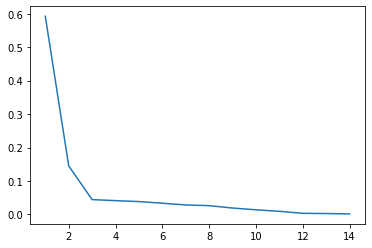

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
# import numpy as np
scree_data = df.drop(columns = [target])
pca = PCA(n_components = len(scree_data.columns))
pca.fit(scree_data)
n_comp = np.arange(1, len(scree_data.columns) + 1)
plt.plot(n_comp, pca.explained_variance_ratio_)

In [ ]:
import math
totalDays = len(df)
split = math.floor(0.8 * totalDays)
print(split)
df_train = df.iloc[:split, :]
df_test = df.iloc[split:, :]
split = math.floor(0.5 * len(df_train))
print(split)
base_train = df_train.iloc[:split, :]
base_test = df_train.iloc[split:, :]
print(len(base_test))



2616
1308
1308


In [ ]:
x_train = base_train.drop(columns = [target])
y_train = base_train[target]
x_test = base_test.drop(columns = [target])
y_test = base_test[target]

In [ ]:
base_train.head()
# x = base_train['BBH'].rolling(3, win_type ='triang')
# print(x)

,BBH,ILMN,AMGN,BMRN,BIIB,VRTX,SGEN,GILD,ICLR,INCY,XBI,PBE,IBB,^VIX,SPY
Date,,,,,,,,,,,,,,,
2010-01-05 00:00:00-05:00,0.003463,-0.024100,0.012361,0.006864,0.013897,0.004901,0.030273,-0.000692,-0.015596,0.031453,0.003868,0.007155,0.000364,-0.075185,0.007920
2010-01-06 00:00:00-05:00,-0.003045,-0.004281,-0.006803,-0.004719,-0.029605,-0.012773,0.000948,0.014760,0.033551,0.091483,0.003485,-0.001776,0.005455,-0.022943,0.002296
2010-01-07 00:00:00-05:00,0.001629,0.066138,-0.009308,0.017387,0.002448,-0.011997,0.027462,0.017046,0.018034,0.059730,0.014991,0.005931,0.003617,0.004594,-0.000177
2010-01-08 00:00:00-05:00,-0.003558,0.011166,-0.006027,0.042465,-0.004321,-0.013095,-0.009217,0.004693,0.062888,-0.016364,-0.002161,0.002359,-0.002523,-0.020833,0.003436
2010-01-11 00:00:00-05:00,0.017240,0.021472,0.015338,0.005961,0.020755,-0.015440,0.007442,-0.012678,0.001250,0.012939,0.011011,0.002353,0.013608,-0.121432,0.010448


# Training and Testing Base Model

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from itertools import product
from sklearn.linear_model import LinearRegression


# t = 30
# lookback = 20
C = 1
gamma = 0.01
epsilon = 0.000001
pca_comp = 1
base_model = make_pipeline(StandardScaler(), PCA(n_components=pca_comp), 
                      SVR(C=C, gamma=gamma, epsilon=epsilon))
# base_model = make_pipeline(StandardScaler(), PCA(n_components=pca_comp), 
#                       LinearRegression())
# X_train = data[s].iloc[t-lookback:t+1].values
# y_train = data[y].iloc[t-lookback:t+1].values.flatten()
base_model.fit(x_train,y_train.values.flatten())
# X_test = data[s].iloc[t].values.reshape(1,-1)
y_pred = base_model.predict(x_test)
print(y_pred)
# predictions.append(yhat)

results = pd.DataFrame()
# results['Ticker'] = testRussell2021['Ticker']
results['Actual'] = y_test
results['Predicted'] = y_pred.tolist()

[ 0.00532609  0.00982266  0.02966802 ... -0.00803519  0.02702382
 -0.02074348]


In [ ]:
#Running prediction models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


#Trying different models:
# base_model = LinearRegression()
# classifier = LogisticRegression(random_state = 0)
#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier = GaussianNB()
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
# classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier = KNeighborsClassifier(n_neighbors =3, metric = 'minkowski', p = 5)


# base_model.fit(x_train, y_train)

# y_pred = base_model.predict(x_test)

# results = pd.DataFrame()
# results['Actual'] = y_test
# results['Predicted'] = y_pred.tolist()



In [ ]:
results.head()

,Actual,Predicted
Date,,
2015-03-18 00:00:00-04:00,0.005098,0.005326
2015-03-19 00:00:00-04:00,0.012606,0.009823
2015-03-20 00:00:00-04:00,0.036391,0.029668
2015-03-23 00:00:00-04:00,-0.029071,-0.020129
2015-03-24 00:00:00-04:00,-0.007760,-0.005222


<AxesSubplot:xlabel='Date'>

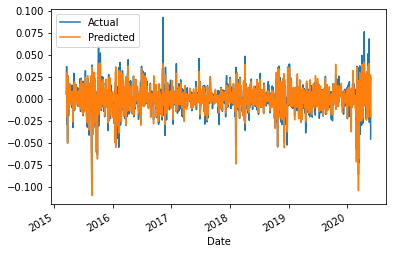

In [ ]:
results.plot(y=['Actual', 'Predicted'])


In [ ]:
# import matplotlib.pyplot as plt

# coefs = pd.DataFrame(
#    base_model.model.coef_,
#    columns=['Coefficients'], index=x_train.columns
# )

# coefs.plot(kind='barh', figsize=(9, 7))
# plt.title('Linear model')
# plt.axvline(x=0, color='.5')
# plt.subplots_adjust(left=.3)

In [ ]:
def getPredPrices(df_prices_test, results):
  predicted = []
  # predicted.append(None)
  print(len(results))
  for i in range(1, len(results)):
    predicted.append(df_prices_test.iloc[i-1][target] * (1 + results.iloc[i]['Predicted']))
  df_prices_test = df_prices_test.iloc[1:, :]
  df_prices_test['Predicted'] = predicted
  return df_prices_test


In [ ]:
def makeSignals(df_prices_test):
  differences = []
  for i in range(len(df_prices_test)):
    differences.append(df_prices_test.iloc[i]['Predicted'] - df_prices_test.iloc[i][target])
  df_prices_test['Difference'] = differences

  signals = []
  lookback = 20
  sum = 0
  mean = 0
  bollinger_threshold = 0.6
  for i in range(len(df_prices_test)):
    sum = sum + df_prices_test.iloc[i]['Difference']
    if i < 20:
      signals.append(0)
      continue
    sum = sum - df_prices_test.iloc[i-lookback]['Difference']
    mean = sum/lookback
    std = np.std(df_prices_test['Difference'][i-lookback : i])
    threshold = mean + bollinger_threshold*std
    if df_prices_test.iloc[i]['Difference'] > threshold:
      signals.append(1)
    else:
      signals.append(0)
  df_prices_test['Signal'] = signals
  return df_prices_test

In [ ]:
df_prices_test = getPredPrices(df_prices_test, results)
df_prices_test = makeSignals(df_prices_test)

1308


<ipython-input-419-3b4a2fe13966>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_test['Predicted'] = predicted


<AxesSubplot:xlabel='Date'>

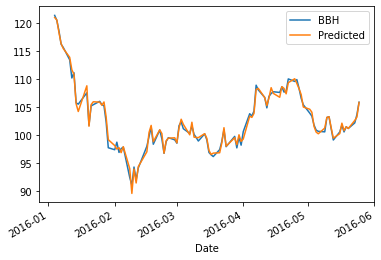

In [ ]:
# df_prices_test.plot(y=['BBH', 'Predicted'])
df_prices_test2 = df_prices_test.iloc[200:300, :]
df_prices_test2.plot(y=[target, 'Predicted'])


# Backtesting Base Strategy

In [ ]:
def getInfo(df, actual, predicted):
  tp = 0
  fp = 0
  p = 0
  n = 0
  correctness = []
  for i in range(len(df)):
    if df.iloc[i][predicted] == 1:
      if df.iloc[i][actual] == 1:
        tp = tp + 1
        p = p + 1
        correctness.append(1)
      else:
        fp = fp + 1
        n = n + 1
        correctness.append(0)
    else:
      if df.iloc[i][actual] == 1:
        # tp = tp + 1
        p = p + 1
        correctness.append(0)
      else:
        # fp = fp + 1
        n = n + 1
        correctness.append(1)

  # df_prices_test.drop(df_prices_test.tail(holding).index, inplace = True)
  # df_prices_test['Labels'] = correctness

  tpr = tp/p
  fpr = fp/n

  print('tpr', tpr)
  print('fpr', fpr)
  print('actual predicted num')
  print('1 1', tp)
  print('1 0', (p - tp))
  print('0 1', fp)
  print('0 0', (n - fp))
  return tpr, fpr

In [ ]:
def backtest(df_prices_test, holding, metalabeled = False):
  i = 0
  start = 100
  cash = start
  sharesHolding = 0
  # holding = 10
  portfolio = []
  spyHold = []
  bbhHold = []
  dailyRet = []
  dailyRet.append(0)
  endHold = 0
  spyShares = cash/df_prices_test.iloc[0]['SPY']
  bbhShares = cash/df_prices_test.iloc[0][target]
  count = 0

  neg_returns = []
  peak = start
  max_drawdown = 0

  for i in range(len(df_prices_test)):
    portfolioToday = cash + sharesHolding * df_prices_test.iloc[i][target]
    portfolio.append(portfolioToday)
    peak = max(peak, portfolioToday)
    max_drawdown = min(max_drawdown, portfolioToday/peak-1)
    if i > 0:
      ret = (portfolio[len(portfolio) - 1] - portfolio[len(portfolio) - 2])/portfolio[len(portfolio) - 2]
      dailyRet.append(ret)
      if ret < 0:
        neg_returns.append(ret)
    spyHold.append(spyShares * df_prices_test.iloc[i]['SPY'])
    bbhHold.append(bbhShares * df_prices_test.iloc[i][target])
    if i < endHold:
      continue
    if i == endHold:
      cash = cash + sharesHolding * df_prices_test.iloc[i][target]
      sharesHolding = 0
    if df_prices_test.iloc[i]['Signal'] == 1:
      if metalabeled and df_prices_test.iloc[i]['Signal2'] != 1:
        continue
      count = count + 1
      sharesHolding = sharesHolding + cash/df_prices_test.iloc[i][target]
      # print("day", i)
      cash = 0
      endHold = i + holding

  df_prices_test['Portfolio'] = portfolio
  df_prices_test['SPYHold'] = spyHold
  df_prices_test['Target'] = bbhHold
  df_prices_test['Daily Returns'] = dailyRet

  totalRet = (df_prices_test.iloc[len(df_prices_test) - 1]['Portfolio'] - start)/start
  rfr = 0.035
  ratio_num = (np.mean(df_prices_test['Daily Returns']) + 1)**252-1 - rfr
  sharpe = ratio_num/(np.std(df_prices_test['Daily Returns'])*(252**0.5))
  sortino = ratio_num/(np.std(neg_returns)*(252**0.5))

  return sharpe, max_drawdown, sortino
  # sortino = ratio_num/(np.std(neg_pcts)*(252**0.5))
  # sharpe = (totalRet - 0.035)/np.std(df_prices_test['Daily Returns'])


In [ ]:
def getStats(df_prices_test, holding, signalCol = 'Signal'):
  tp = 0
  fp = 0
  p = 0
  n = 0
  correctness = []
  labels = []
  actual = []
  for i in range(len(df_prices_test) - holding):
    price = df_prices_test.iloc[i][target]
    forwardPrice = df_prices_test.iloc[i + holding][target]
    if df_prices_test.iloc[i]['Signal'] == 1:
      if price <= forwardPrice:
        tp = tp + 1
        p = p + 1
        correctness.append(1)
        labels.append(1)
        actual.append(1)
      else:
        fp = fp + 1
        n = n + 1
        correctness.append(0)
        labels.append(0)
        actual.append(0)
    else:
      if price <= forwardPrice:
        p = p + 1
        correctness.append(0)
        labels.append(0)
        actual.append(1)
      else:
        n = n + 1
        correctness.append(1)
        labels.append(0)
        actual.append(0)

  df_prices_test.drop(df_prices_test.tail(holding).index, inplace = True)
  df_prices_test['Labels'] = labels
  df_prices_test['ActualSignal'] = actual

  tpr = tp/p
  fpr = fp/n

  print('tpr', tpr)
  print('fpr', fpr)
  return tpr, fpr

In [ ]:
sharpe = backtest(df_prices_test, 2)
# print(totalRet, ratio_num)
print('sharpe: ', sharpe)

tpr, fpr = getStats(df_prices_test, 2)
# print(count, " trades")

sharpe:  (0.35094247020605207, -0.24512999169753302, 0.34510723506307384)
tpr 0.28064992614475626
fpr 0.27229299363057324


In [ ]:
getInfo(df_prices_test, 'ActualSignal', 'Signal')

tpr 0.28064992614475626
fpr 0.27229299363057324
actual predicted num
1 1 190
1 0 487
0 1 171
0 0 457


(0.28064992614475626, 0.27229299363057324)

<AxesSubplot:xlabel='Date'>

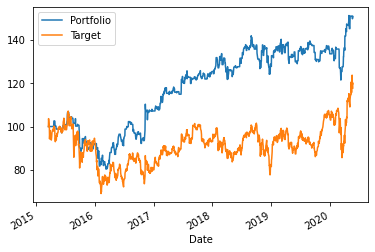

In [ ]:
df_prices_test.plot(y=['Portfolio', 'Target'])

# Meta-labeling

In [ ]:
def getMetalabelModel(df):
  # df2 = df.drop(columns = removeCols, inplace = False)
  x_train = df.drop(columns = ['Labels', target])
  y_train = df['Labels']
  classifier = RandomForestClassifier(n_estimators =100, criterion = 'entropy')
  classifier.fit(x_train, y_train)
  return classifier



In [ ]:
def runBaseModel(x_test, y_test):
  y_pred = base_model.predict(x_test)
  results = pd.DataFrame()
  results['Actual'] = y_test
  results['Predicted'] = y_pred.tolist()
  return results

In [ ]:
#First, train metalabel model
base_test.head()
print(len(base_test))
base_test.dropna(axis=0, inplace = True)
print(len(base_test))
meta_train = base_test.iloc[1:, :]
meta_train['Signal'] = df_prices_test['Signal']
meta_train['Labels'] = df_prices_test['Labels']
print(len(meta_train))
meta_train.dropna(axis=0, inplace = True)
print(len(meta_train))
metaModel = getMetalabelModel(meta_train)
# meta_train.head()

1308
1308
1307
1305


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
<ipython-input-431-df8fb9d24cd5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_train['Signal'] = df_prices_test['Signal']
<ipython-input-431-df8fb9d24cd5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [ ]:
#Generate signals of base model
# x_test = df_prices_metatest.drop(columns = [target])
# y_test = df_prices_metatest[target]
x_test = df_test.drop(columns = [target])
y_test = df_test[target]

results = runBaseModel(x_test, y_test)
df_prices_metatest = getPredPrices(df_prices_metatest, results)
df_prices_metatest = makeSignals(df_prices_metatest)
print(len(df_prices_metatest))


655


<ipython-input-419-3b4a2fe13966>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_test['Predicted'] = predicted


654


In [ ]:
#Run metalabeling model
df_test = df_test.iloc[1:, :]
df_test['Signal'] = df_prices_metatest['Signal']
# df_test['Label'] = df_prices_metatest['Label']
x_test = df_test.drop(columns = [target])
# y_test = df_test['Label']

y_pred = metaModel.predict_proba(x_test)
results = pd.DataFrame()
# results['Actual'] = y_test
results['Probabilities'] = y_pred.tolist()
# results['Predicted'] = y_pred.tolist()
# results.head(20)
# print(results.iloc[30:50, :])
df_results = df_prices_metatest.copy()

<ipython-input-433-2ef79f4dcc47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Signal'] = df_prices_metatest['Signal']


sharpe:  0.6250057049639367 max_drawdown -0.2441053512105381 sortino 0.638115387816081
tpr 0.28023598820059
fpr 0.21405750798722045


<AxesSubplot:xlabel='Date'>

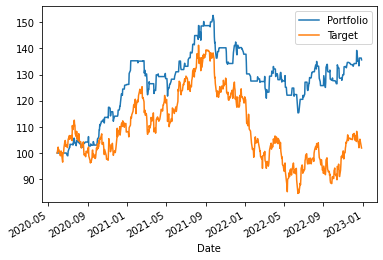

In [ ]:
#Backtest non metlabeled model
sharpe, max_drawdown, sortino = backtest(df_prices_metatest, 2)
print('sharpe: ', sharpe, 'max_drawdown', max_drawdown, 'sortino', sortino)
tpr, fpr = getStats(df_prices_metatest, 2)
df_prices_metatest.plot(y=['Portfolio', 'Target'])


In [ ]:
getInfo(df_prices_metatest, 'ActualSignal', 'Signal')

tpr 0.28023598820059
fpr 0.21405750798722045
actual predicted num
1 1 95
1 0 244
0 1 67
0 0 246


(0.28023598820059, 0.21405750798722045)

In [ ]:
def backtestMeta(df_prices_test, holding,  metaThresh, metalabeled = True):
  # meta_threshold = 0.45
  i = 0
  start = 100
  cash = start
  sharesHolding = 0
  # holding = 10
  portfolio = []
  spyHold = []
  bbhHold = []
  dailyRet = []
  dailyRet.append(0)
  endHold = 0
  spyShares = cash/df_prices_test.iloc[0]['SPY']
  bbhShares = cash/df_prices_test.iloc[0][target]
  count = 0

  neg_returns = []
  peak = start
  max_drawdown = 0

  sumWin = 0
  winCount = 0
  sumLoss = 0
  lossCount = 0
  for i in range(len(df_prices_test)):
    if i >= holding:
      change = df_prices_test.iloc[i][target] - df_prices_test.iloc[i-holding][target]
      if change < 0:
        sumLoss = sumLoss + change
        lossCount = lossCount + 1
      else:
        sumWin = sumWin + change
        winCount = winCount + 1
    portfolioToday = cash + sharesHolding * df_prices_test.iloc[i][target]
    portfolio.append(portfolioToday)
    peak = max(peak, portfolioToday)
    max_drawdown = min(max_drawdown, portfolioToday/peak-1)
    if i > 0:
      ret = (portfolio[len(portfolio) - 1] - portfolio[len(portfolio) - 2])/portfolio[len(portfolio) - 2]
      dailyRet.append(ret)
      if ret < 0:
        neg_returns.append(ret)
    spyHold.append(spyShares * df_prices_test.iloc[i]['SPY'])
    bbhHold.append(bbhShares * df_prices_test.iloc[i][target])
    if i < endHold:
      continue
    if i == endHold:
      cash = cash + sharesHolding * df_prices_test.iloc[i][target]
      sharesHolding = 0
    if df_prices_test.iloc[i]['Signal'] == 1:
      if metalabeled and (df_prices_test.iloc[i]['Metalabeled'])[1] < metaThresh:
        continue
      count = count + 1
      # tradingCash = ((df_prices_test.iloc[i]['Metalabeled'])[1]/0.50) * cash
      p = (df_prices_test.iloc[i]['Metalabeled'])[1]
      if p < 0.5:
        p = 0.5
      b = (sumWin/winCount)/(sumLoss/lossCount)
      tradingCash =  (p- ((1 - p)/b)) * cash
      if tradingCash > cash:
        tradingCash = cash
      # tradingCash = cash
      sharesHolding = sharesHolding + tradingCash/df_prices_test.iloc[i][target]
      # print("day", i)
      cash = cash - tradingCash
      endHold = i + holding

  df_prices_test['Portfolio'] = portfolio
  df_prices_test['SPYHold'] = spyHold
  df_prices_test['Target'] = bbhHold
  df_prices_test['Daily Returns'] = dailyRet
  print('count', count)
  totalRet = (df_prices_test.iloc[len(df_prices_test) - 1]['Portfolio'] - start)/start
  print("total ret",totalRet)
  
  dates = list(df_prices_test.index.values)
  rounded = np.array(dates, dtype='datetime64[D]')
  time = rounded[len(rounded) - 1] - rounded[0]
  days = time/np.timedelta64(1, 'D')
  years = days/365.0

  rfr = 0.035
  ratio_num = (np.mean(df_prices_test['Daily Returns'])+1)**252-1 - rfr
  print('avg daily returns', np.mean(df_prices_test['Daily Returns']))
  print('ratio num', ratio_num)
  print("rfr", rfr)
  sharpe = ratio_num/(np.std(df_prices_test['Daily Returns'])*(252**0.5))
  sortino = ratio_num/(np.std(neg_returns)*(252**0.5))

  return sharpe, max_drawdown,  sortino
  # sortino = ratio_num/(np.std(neg_pcts)*(252**0.5))
  # sharpe = (totalRet - 0.035)/np.std(df_prices_test['Daily Returns'])


652
654
tpr 0.19174041297935104
fpr 0.10793650793650794
actual predicted num
1 1 65
1 0 274
0 1 34
0 0 281
count 87
total ret 0.4603086829415898
avg daily returns 0.0006095492068916153
ratio num 0.13097728175392112
rfr 0.035
sharpe:  1.0557701070759982 max_drawdown -0.16489267331165114 sortino 0.8951715486896277
tpr 0.19174041297935104
fpr 0.10793650793650794
actual predicted num
1 1 65
1 0 274
0 1 34
0 0 281


<AxesSubplot:xlabel='Date'>

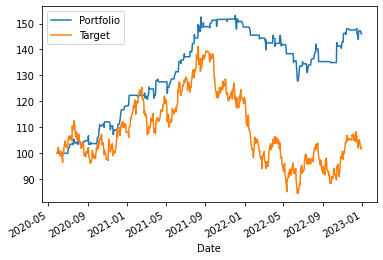

In [ ]:
print(len(df_prices_metatest))
print(len(y_pred))
df_results['Metalabeled'] = y_pred.tolist()
meta_threshold = 0.45

metaSignals = []
actual = []
for i in range(len(df_results)):
  if df_results.iloc[i]['Signal'] == 1 and (df_results.iloc[i]['Metalabeled'])[1] >= meta_threshold:
    metaSignals.append(1)
  else:
    metaSignals.append(0)
  if i >= len(df_results) - 2:
    actual.append(0)
    continue
  if df_results.iloc[i][target] <= df_results.iloc[i + 2][target]:
    actual.append(1)
  else:
    actual.append(0)
df_results['Actual'] = actual
df_results['Metasignal'] = metaSignals
getInfo(df_results, 'Actual', 'Metasignal')


sharpe, max_drawdown, sortino = backtestMeta(df_results, 2, meta_threshold, metalabeled = True)
print('sharpe: ', sharpe, 'max_drawdown', max_drawdown, 'sortino', sortino)
# tpr, fpr = getStats(df_prices_metatest, 10)
getInfo(df_results, 'Actual', 'Metasignal')
df_results.plot(y=['Portfolio', 'Target'])


<AxesSubplot:xlabel='Date'>

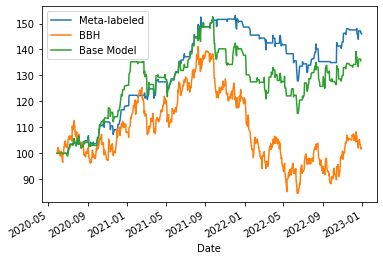

In [ ]:
df_results['BaseModel'] = df_prices_metatest['Portfolio']
# plt.figure(figsize=(10,6))
df_results.plot(y=['Portfolio', 'Target', 'BaseModel'], label = ['Meta-labeled', 'BBH', 'Base Model'])


In [ ]:
df_results.head()

,BBH,ILMN,AMGN,BMRN,BIIB,VRTX,SGEN,GILD,ICLR,INCY,...,Difference,Signal,Metalabeled,Actual,Metasignal,Portfolio,SPYHold,Target,Daily Returns,BaseModel
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-29 00:00:00-04:00,156.319212,372.000000,206.915276,106.000000,300.980011,281.350006,154.919998,67.404456,166.220001,101.209999,...,-1.337153,0,"[0.97, 0.03]",1,0,100.0,100.000000,100.000000,0.0,100.0
2020-06-01 00:00:00-04:00,159.833684,361.140015,210.492603,106.510002,305.720001,285.420013,156.899994,67.137573,167.639999,101.699997,...,-2.318879,0,"[0.99, 0.01]",0,0,100.0,100.383541,102.248266,0.0,100.0
2020-06-02 00:00:00-04:00,158.348707,364.399994,207.650962,106.709999,300.279999,283.920013,159.470001,66.159026,169.350006,101.120003,...,1.209752,0,"[0.96, 0.04]",0,0,100.0,101.352218,101.298302,0.0,100.0
2020-06-03 00:00:00-04:00,158.328890,366.049988,205.526684,108.339996,303.040009,283.720001,159.089996,66.167904,170.940002,100.809998,...,1.181888,0,"[0.98, 0.02]",0,0,100.0,102.572241,101.285625,0.0,100.0
2020-06-04 00:00:00-04:00,156.933017,355.290009,203.025275,109.940002,302.989990,274.269989,154.050003,65.936628,168.020004,98.190002,...,-0.301583,0,"[0.94, 0.06]",0,0,100.0,102.859886,100.392662,0.0,100.0


In [ ]:
signal = []
for i in range(len(df_results)):
  if (df_results.iloc[i]['Metalabeled'])[1] >= meta_threshold:
    signal.append(1)
  else:
    signal.append(0)
df_results['MetalabelSignal'] = signal
df_results['ActualSignal'] = df_prices_metatest['ActualSignal']

In [ ]:
getInfo(df_results, 'ActualSignal', 'MetalabelSignal')

tpr 0.19174041297935104
fpr 0.10793650793650794
actual predicted num
1 1 65
1 0 274
0 1 34
0 0 281


(0.19174041297935104, 0.10793650793650794)